<a href="https://colab.research.google.com/github/Neelhmodi/CODSOFT_INTERNSHIP/blob/main/CODSOFT_TASK_4_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression


Load Data and shows first 5 rows of data.

In [88]:
sales_df=pd.read_csv('/content/advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Calculates the number of rows and columns

In [89]:
sales_df.shape

(200, 4)

Extracting all information about data.

In [90]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Calculates statistical values

In [91]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Mark null values as True and returns sum of number of True values in each column

In [92]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data preprocessing

In [93]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sales_df.drop('Sales', axis=1))
scaled_features_df = pd.DataFrame(scaled_features, columns=sales_df.drop('Sales', axis=1).columns)


 shows first 5 rows of data after data preprocessing.

In [100]:
scaled_features_df.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


Calculates statistical values after data preprocessing

In [101]:
scaled_features_df.describe()

,TV,Radio,Newspaper
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.221245e-16,-4.529710e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


Data visualization

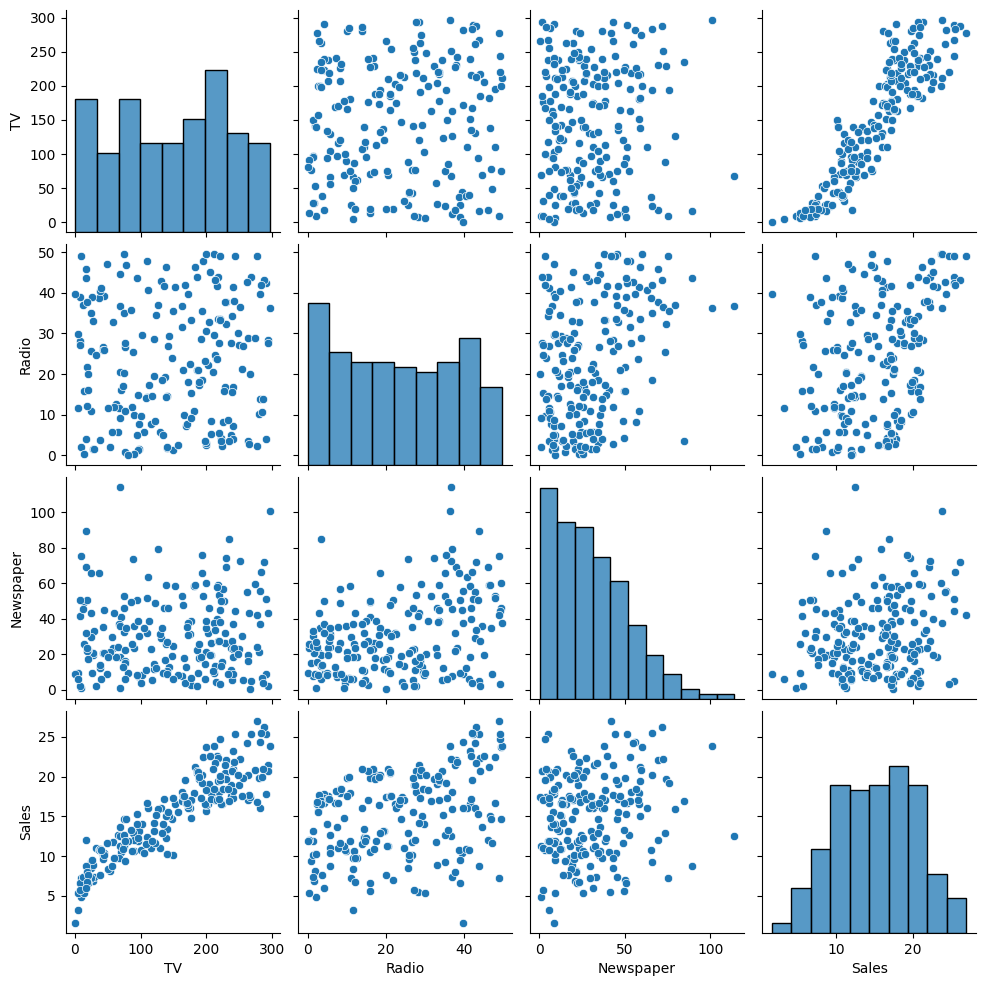

In [94]:
sns.pairplot(sales_df)
plt.show()

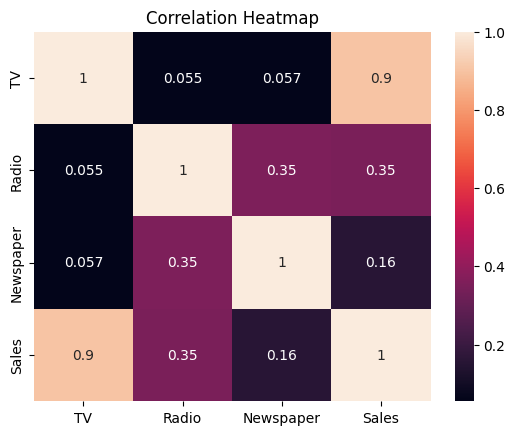

In [95]:
sns.heatmap(sales_df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

Deviding the data into Dependent and Independent variables.

In [96]:
x=sales_df.drop(['Sales'],axis=1)
y=sales_df['Sales']

In [97]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [98]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


Deviding the cleaned data into training and testing sets and checking the null value in train and test data

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

create first ML model using LinearRegression and train the model

In [102]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Find the coefficient

In [103]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

Find intercept

In [104]:
lr.intercept_

4.714126402214127

check r2_score , MSE , MAE , MAPE

In [110]:
df_lr={
    'Model':['Linear Regression'],
    'Score':[round(r2_score(y_test,lr.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,lr.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,lr.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,lr.predict(x_test)),4)*100]
}
df_lr=pd.DataFrame(df_lr)
df_lr

,Model,Score,MSE,MAE,MAPE
0,Linear Regression,90.59,2.9078,1.2748,10.88


Draw the prediction line

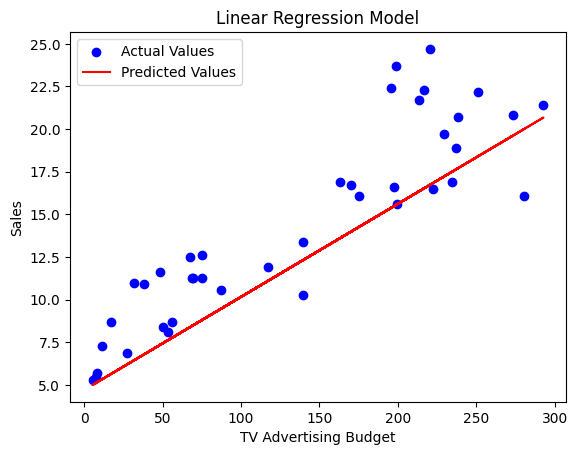

In [108]:
# Extract the coefficients and intercept from the trained model
coefficients = lr.coef_
intercept = lr.intercept_

# Calculate the predicted values for the test data
y_pred = lr.predict(x_test)

# Plot the original data points
plt.scatter(x_test['TV'], y_test, color='blue', label='Actual Values')

# Plot the regression line
plt.plot(x_test['TV'], coefficients[0] * x_test['TV'] + intercept, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Model')

# Add legend and show the plot
plt.legend()
plt.show()

create second ML model using Ridge and train the model

In [111]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

check r2_score , MSE , MAE , MAPE

In [150]:
df_ridge={
    'Model':['Ridge'],
    'Score':[round(r2_score(y_test,ridge.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,ridge.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,ridge.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,ridge.predict(x_test)),4)*100]
}
df_ridge=pd.DataFrame(df_ridge)
df_ridge

,Model,Score,MSE,MAE,MAPE
0,Ridge,90.59,2.9078,1.2748,10.88


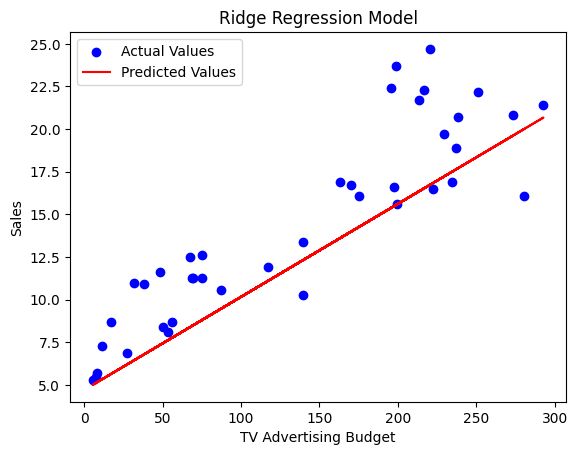

In [123]:
# Extract the coefficients and intercept from the trained model
coefficients = ridge.coef_
intercept = ridge.intercept_

# Calculate the predicted values for the test data
y_pred = ridge.predict(x_test)

# Plot the original data points
plt.scatter(x_test['TV'], y_test, color='blue', label='Actual Values')

# Plot the regression line
plt.plot(x_test['TV'], coefficients[0] * x_test['TV'] + intercept, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Ridge Regression Model')

# Add legend and show the plot
plt.legend()
plt.show()


create third ML model using Lasso and train the model

In [117]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

check r2_score , MSE , MAE , MAPE

In [151]:
df_lasso={
    'Model':['Lasso'],
    'Score':[round(r2_score(y_test,lasso.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,lasso.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,lasso.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,lasso.predict(x_test)),4)*100]
}
df_lasso=pd.DataFrame(df_lasso)
df_lasso

,Model,Score,MSE,MAE,MAPE
0,Lasso,90.52,2.9289,1.2726,10.8


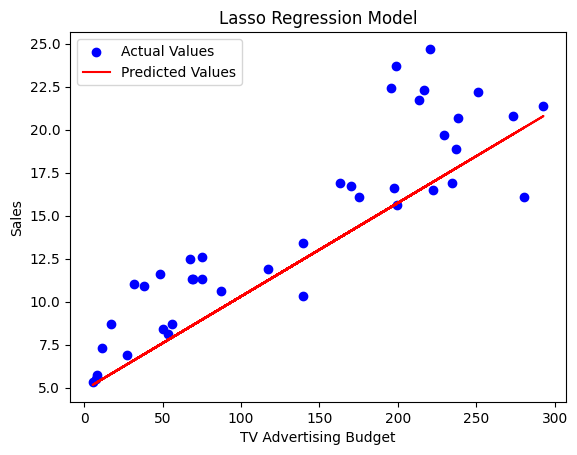

In [124]:
# Extract the coefficients and intercept from the trained model
coefficients = lasso.coef_
intercept = lasso.intercept_

# Calculate the predicted values for the test data
y_pred = lasso.predict(x_test)

# Plot the original data points
plt.scatter(x_test['TV'], y_test, color='blue', label='Actual Values')

# Plot the regression line
plt.plot(x_test['TV'], coefficients[0] * x_test['TV'] + intercept, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Lasso Regression Model')

# Add legend and show the plot
plt.legend()
plt.show()


create Four ML model using ElasticNet and train the model

In [125]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)

ElasticNet()

check r2_score , MSE , MAE , MAPE

In [152]:
df_elastic={
    'Model':['ElasticNet'],
    'Score':[round(r2_score(y_test,elastic.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,elastic.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,elastic.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,elastic.predict(x_test)),4)*100]
}
df_elastic=pd.DataFrame(df_elastic)
df_elastic

,Model,Score,MSE,MAE,MAPE
0,ElasticNet,90.55,2.9201,1.2727,10.83


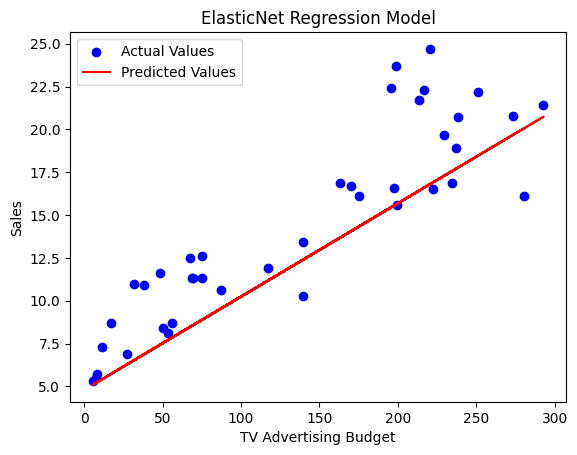

In [131]:
# Extract the coefficients and intercept from the trained model
coefficients = elastic.coef_
intercept = elastic.intercept_

# Calculate the predicted values for the test data
y_pred = elastic.predict(x_test)

# Plot the original data points
plt.scatter(x_test['TV'], y_test, color='blue', label='Actual Values')

# Plot the regression line
plt.plot(x_test['TV'], coefficients[0] * x_test['TV'] + intercept, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('ElasticNet Regression Model')

# Add legend and show the plot
plt.legend()
plt.show()


create Five ML model using RandomForestRegressor and train the model

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

check r2_score , MSE , MAE , MAPE

In [153]:
df_rf={
    'Model':['RandomForestRegressor'],
    'Score':[round(r2_score(y_test,rf.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,rf.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,rf.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,rf.predict(x_test)),4)*100]
}
df_rf=pd.DataFrame(df_rf)
df_rf

,Model,Score,MSE,MAE,MAPE
0,RandomForestRegressor,95.43,1.412,0.9023,7.36


create Six ML model using GradientBoostingRegressor and train the model

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

check r2_score , MSE , MAE , MAPE

In [154]:
df_gb={
    'Model':['GradientBoostingRegressor'],
    'Score':[round(r2_score(y_test,gb.predict(x_test)),4)*100],
    'MSE':[round(mean_squared_error(y_test,gb.predict(x_test)),4)],
    'MAE':[round(mean_absolute_error(y_test,gb.predict(x_test)),4)],
    'MAPE':[round(mean_absolute_percentage_error(y_test,gb.predict(x_test)),4)*100]
}
df_gb=pd.DataFrame(df_gb)
df_gb

,Model,Score,MSE,MAE,MAPE
0,GradientBoostingRegressor,95.91,1.2631,0.8323,7.12
